<h1 alingn="center">Вариант 24 </h1>

In [15]:
from math import e
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return 2 * e ** x - 2 * x + 3

a, b = 1, 2
n = 5
x_mas = np.arange(a, b+0.00000000000001, (b-a) / n)
f_mas = []
for i in x_mas:
    f_mas.append(f(i))

<h1 alingn="center">Вариант 25 </h1>

In [16]:
from math import e
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return 3 ** x + 2 - x

a, b = 1, 2
n = 5
x_mas = np.arange(a, b+0.00000000000001, (b-a) / n)
f_mas = []
for i in x_mas:
    f_mas.append(f(i))

<h2>Среднеквадратичное приближение

In [17]:
def rms(x_mas, y_mas, f):
    s = 0
    for i in enumerate(x_mas):
        s += (y_mas[i[0]] - f(i[1])) ** 2
    return s

<h1>Интерполяционный метод Ньютона

In [18]:
def div_dif(d, x, y, i, j, f_dict):
    if (x[i], x[j]) in f_dict:
        return f_dict[(x[i], x[j])]
    if x[i] > x[j]:
        x[i], x[j] = x[j], x[i]
    if x[i] + d == x[j]:
        f_dict[(x[i], x[j])] = (y[j] - y[i]) / d
        return f_dict[(x[i], x[j])]
    else:
        f_dict[(x[i], x[j])] = (div_dif(d, x, y, i+1, j, f_dict) - div_dif(d, x, y, i, j-1, f_dict)) / (x[j] - x[i])
        return f_dict[(x[i], x[j])]

def int_new_prep(x_mas, y_mas):
    f_dict = {}
    div_dif(x_mas[1] - x_mas[0], x_mas, y_mas, 0, len(x_mas)-1, f_dict)
    return f_dict

def int_new(x_mas, y_mas, x, f_dict):
    s = 0
    prod = 1
    ind = []
    for i in enumerate(x_mas):
        if i[0] == 0:
            s += y_mas[0] 
        else:
            prod *= (x - x_mas[i[0] -1])
            ind.append((x - x_mas[i[0] -1]))
            s += prod * f_dict[(x_mas[0], i[1])] 
    return s, ind

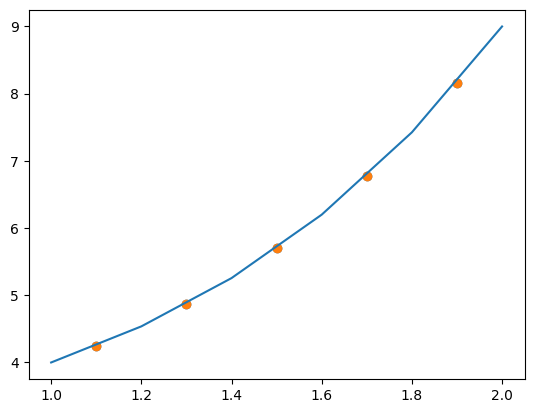

-1.13639971157653e-05
3.904375158292339e-06
-2.876566765230848e-06
4.156939480637334e-06
-1.2882429837546283e-05


3.3589635654362717e-10

In [19]:

x1 = np.arange(a + (b-a) / (2 * n), b - (b-a) / (2 * n)+0.00000000000001, (b-a) / n)
y1 = []
for i in x1:
    y1.append(f(i))
fd = int_new_prep(x_mas, f_mas)
y2_new, ind_mas_new = [], []
for i in x1:
    temp = int_new(x_mas, f_mas, i, fd)
    ind_mas_new.append(temp[1])
    y2_new.append(temp[0])
plt.plot(x_mas, f_mas)
plt.scatter(x1,y1)
plt.scatter(x1,y2_new)
plt.show()
for i in range(len(y1)):
    print(y1[i] - y2_new[i])
rms(x1, y2_new, f)

{(0.0, 1.0): 2.0, (-1.0, 0.0): 0.6666666666666667, (-1.0, 1.0): 0.6666666666666666}


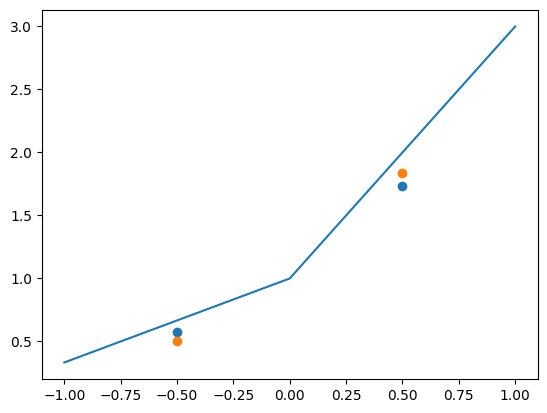

0.07735026918962562
-0.10128252576445607


In [20]:
from math import e
import numpy as np
import matplotlib.pyplot as plt
def div_dif(d, x, y, i, j, f_dict):
    if (x[i], x[j]) in f_dict:
        return f_dict[(x[i], x[j])]
    if x[i] > x[j]:
        x[i], x[j] = x[j], x[i]
    if x[i] + d == x[j]:
        f_dict[(x[i], x[j])] = (y[j] - y[i]) / d
        return f_dict[(x[i], x[j])]
    else:
        f_dict[(x[i], x[j])] = (div_dif(d, x, y, i+1, j, f_dict) - div_dif(d, x, y, i, j-1, f_dict)) / (x[j] - x[i])
        return f_dict[(x[i], x[j])]

def int_new_prep(x_mas, y_mas):
    f_dict = {}
    div_dif(x_mas[1] - x_mas[0], x_mas, y_mas, 0, len(x_mas)-1, f_dict)
    return f_dict

def int_new(x_mas, y_mas, x, f_dict):
    d = x_mas[1] - x_mas[0]
    s = 0
    prod = 1
    for i in enumerate(x_mas):
        if i[0] == 0:
            s += y_mas[0] 
        else:
            prod *= (x - x_mas[i[0] -1])
            s += prod * f_dict[(x_mas[0], i[1])] 
    return s

def ff(x):
    return 3 ** (x)
x = np.arange(-1, 1.+0.00000000000001, 1)
fm = []
for i in x:
    fm.append(ff(i))

x1 = np.arange( -1 / 2, 1 / 2 +0.00000000000001, 1)
y1 = []
for i in x1:
    y1.append(ff(i))
fd = int_new_prep(x, fm)
print(fd)
y2 = []
for i in x1:
    y2.append(int_new(x, fm, i, fd))
plt.plot(x, fm)
plt.scatter(x1,y1)
plt.scatter(x1,y2)
plt.show()
for i in range(len(y1)):
    print(y1[i] - y2[i])

<h1>Метод кубических сплайнов дефекта 1

In [21]:
def m(h ,f_mas, i):
    if i == 0:
        return (4*f_mas[1] - f_mas[2] - 3*f_mas[0]) / (2 * h)
    elif i == len(f_mas)-1:
        return (4*f_mas[-1] - f_mas[-3] - 3*f_mas[-2]) / (2 * h)
    else:
        return (f_mas[i+1] - f_mas[i-1]) / (2 * h)
    
def cubic_spline(x_mas, f_mas, x):
    h = x_mas[1] - x_mas[0]
    for i in enumerate(x_mas):
        if i[1] > x:
            a, b = i[0] - 1, i[0]
            break
    return ((f_mas[a] * (x_mas[b]-x)**2 * (2*(x-x_mas[a])+h) / h**3)
        + (f_mas[b] * (x-x_mas[a])**2 * (2*(x_mas[b]-x)+h) / h**3)
        + (m(h,f_mas,a) * (x_mas[b]-x)**2 * (x-x_mas[a]) / h**2)
        + (m(h,f_mas,b) * (x-x_mas[a])**2 * (x-x_mas[b]) / h**2)), (
        (x_mas[b]-x)**2 * (2*(x-x_mas[a])+h) / h**3, (x-x_mas[a])**2 * (2*(x_mas[b]-x)+h) / h**3,
          (x_mas[b]-x)**2 * (x-x_mas[a]) / h**2,(x-x_mas[a])**2 * (x-x_mas[b]) / h**2)

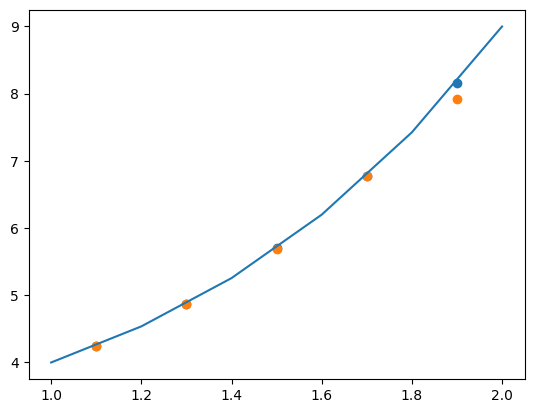

0.0024169981850592492
0.00022877778907837154
0.00028499557015138066
0.000355027799392893
0.2466627251754323


In [22]:
x1 = np.arange(a + (b-a) / (2 * n), b - (b-a) / (2 * n)+0.00000000000001, (b-a) / n)
y1 = []
for i in x1:
    y1.append(f(i))
y2_cub, ind_mas_cub = [], []
for i in x1:
    temp = cubic_spline(x_mas, f_mas, i)
    ind_mas_cub.append(temp[1])
    y2_cub.append(temp[0])
plt.plot(x_mas, f_mas)
plt.scatter(x1,y1)
plt.scatter(x1,y2_cub)
plt.show()
for i in range(len(y1)):
    print(y1[i] - y2_cub[i])

In [31]:
def estimate(ind_mas, f, e):
    fe = f(e)
    m = []
    for i in ind_mas:
        n = 1
        s = 1
        for omega in i:
            s *= fe * omega / n
            n += 1
        m.append(s)
    return m

new = estimate(ind_mas_new, f, 10**(-10))
cub = estimate(ind_mas_cub, f, 10**(-10))
print("{:<25}  {:<25}  {:<25}  {:<25}".format("F(x)", "Настоящая погрешность", "Оценка погрешности", "Разность ОП и НП"))
for i in enumerate(x1):
    df = f(i[1]) - y2_new[i[0]]
    print("{:<25}  {:<25}  {:<25}  {:<25}".format(f(i[1]), df, new[i[0]], abs(new[i[0]]) - abs(df) ))
print("-"*108)
for i in enumerate(x1):
    df = f(i[1]) - y2_cub[i[0]]
    print("{:<25}  {:<25}  {:<25}  {:<25}".format(f(i[1]), df, cub[i[0]], abs(cub[i[0]]) - abs(df)))
print(new)
print(cub)

F(x)                       Настоящая погрешность      Оценка погрешности         Разность ОП и НП         
4.248369522101713          -1.13639971157653e-05      0.0021262500000349426      0.0021148860029191773    
4.871167510947728          3.904375158292339e-06      -0.0009112500000149759     0.0009073456248566836    
5.696152422706632          -2.876566765230848e-06     0.0009112500000149764      0.0009083734332497455    
6.773007839923779          4.156939480637334e-06      -0.002126250000034946      0.0021220930605543088    
8.163626138566858          -1.2882429837546283e-05    0.019136250000314537       0.01912336757047699      
------------------------------------------------------------------------------------------------------------
4.248369522101713          0.0024169981850592492      -0.0005273437500069337     -0.0018896544350523155   
4.871167510947728          0.00022877778907837154     -0.0005273437500069337     0.0002985659609285622    
5.696152422706632          0.000284